In [58]:
#Load necessary Packages
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
sns.set(color_codes=True) 
%matplotlib inline 

In [59]:
#Load dataset
data = pd.read_csv('DS - Part3 - CompanyX_EU.csv')
print(data)

             Startup             Product  ... OperatingState Funding_in_million
0             2600Hz          2600hz.com  ...      Operating                NaN
1               3DLT            3dlt.com  ...         Closed            $0.630M
2        3DPrinterOS     3dprinteros.com  ...      Operating                NaN
3         3Dprintler      3dprintler.com  ...      Operating                $1M
4    42 Technologies  42technologies.com  ...      Operating                NaN
..               ...                 ...  ...            ...                ...
657           Zivity          zivity.com  ...      Operating                $8M
658           Zmorph        zmorph3d.com  ...      Operating                $1M
659           Zocdoc          zocdoc.com  ...      Operating              $223M
660             Zula         zulaapp.com  ...      Operating              $3.4M
661           Zumper          zumper.com  ...      Operating             $31.5M

[662 rows x 7 columns]


# Data exploration

In [60]:
#1.Check the datatypes of each attribute
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Startup             662 non-null    object
 1   Product             656 non-null    object
 2   Funding             448 non-null    object
 3   Event               662 non-null    object
 4   Result              662 non-null    object
 5   OperatingState      662 non-null    object
 6   Funding_in_million  448 non-null    object
dtypes: object(7)
memory usage: 36.3+ KB


In [61]:
#2.Check for null values in the attributes.
bool_series = pd.isnull(data["Funding"])
data[bool_series]

,Startup,Product,Funding,Event,Result,OperatingState,Funding_in_million
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating,NaN
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating,NaN
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating,NaN
7,8020 Media,8020media.com,NaN,TC40 2007,Contestant,Operating,NaN
8,About Last Night,aboutlastnight.net,NaN,Disrupt NYC 2012,Contestant,Operating,NaN
...,...,...,...,...,...,...,...
648,YOOBIC,yoobic.com,NaN,Disrupt London 2015,Finalist,Operating,NaN
651,YourVersion,yourversion.com,NaN,TC50 2009,Audience choice,Operating,NaN
652,Yuwan,iyuwan.cn,NaN,Disrupt Beijing 2011,Contestant,Closed,NaN
653,ZAP!,zapreklam.com/,NaN,Disrupt EU 2014,Audience choice,Operating,NaN


# Data preprocessing & visualisation:

In [62]:
#1.Drop the null values
df =  pd.DataFrame(data)
df.dropna()



,Startup,Product,Funding,Event,Result,OperatingState,Funding_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,$0.630M
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,$1M
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,$19.3M
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,$29M
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,$1.8M
...,...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,$8M
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,$1M
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating,$223M
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating,$3.4M


In [63]:
#2.Convert the ‘Funding’ features to a numerical value
df['Funding'] = pd.to_numeric(df['Funding'], errors='coerce')
df = df.dropna(subset=['Funding'])
df['Funding'] = df['Funding'].astype(int)
df['Funding_in_million'] = df['Funding_in_million'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Startup             0 non-null      object
 1   Product             0 non-null      object
 2   Funding             0 non-null      int64 
 3   Event               0 non-null      object
 4   Result              0 non-null      object
 5   OperatingState      0 non-null      object
 6   Funding_in_million  0 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 0.0+ bytes


 Codes for boxplot

**code starts here**

In [64]:
data

,Startup,Product,Funding,Event,Result,OperatingState,Funding_in_million
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating,NaN
1,3DLT,3dlt.com,NaN,Disrupt NYC 2013,Contestant,Closed,$0.630M
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating,NaN
3,3Dprintler,3dprintler.com,NaN,Disrupt NY 2016,Audience choice,Operating,$1M
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating,NaN
...,...,...,...,...,...,...,...
657,Zivity,zivity.com,NaN,TC40 2007,Contestant,Operating,$8M
658,Zmorph,zmorph3d.com,NaN,-,Audience choice,Operating,$1M
659,Zocdoc,zocdoc.com,NaN,TC40 2007,Contestant,Operating,$223M
660,Zula,zulaapp.com,NaN,Disrupt SF 2013,Audience choice,Operating,$3.4M


In [65]:
data['Funding_in_million'] = data['Funding_in_million'].str.replace('$','')

# New Section

In [68]:
data['Funding_in_million'] = data['Funding_in_million'].str.replace('M','')

In [70]:
data['Funding_in_million'] = data['Funding_in_million'].str.replace('K','')

In [71]:
data.drop( data[data['Funding_in_million'].isna()].index, inplace=True)

In [72]:
data.dtypes

Startup                object
Product                object
Funding               float64
Event                  object
Result                 object
OperatingState         object
Funding_in_million     object
dtype: object

In [73]:
data['Funding_in_million'] = data['Funding_in_million'].astype('float')

In [74]:
data

,Startup,Product,Funding,Event,Result,OperatingState,Funding_in_million
1,3DLT,3dlt.com,NaN,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,NaN,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,NaN,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,NaN,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,NaN,Hardware Battlefield 2014,Contestant,Operating,1.80
...,...,...,...,...,...,...,...
657,Zivity,zivity.com,NaN,TC40 2007,Contestant,Operating,8.00
658,Zmorph,zmorph3d.com,NaN,-,Audience choice,Operating,1.00
659,Zocdoc,zocdoc.com,NaN,TC40 2007,Contestant,Operating,223.00
660,Zula,zulaapp.com,NaN,Disrupt SF 2013,Audience choice,Operating,3.40


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



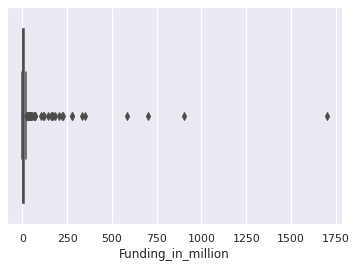

In [75]:
#3.Plot box plot for funds in million
sns.boxplot('Funding_in_million', data=data,)

{'boxes': [<matplotlib.lines.Line2D at 0x7f413b0cc8d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f413b0573c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f413b057ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f413b057b38>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f413b0ccc18>,
  <matplotlib.lines.Line2D at 0x7f413b0ccfd0>]}

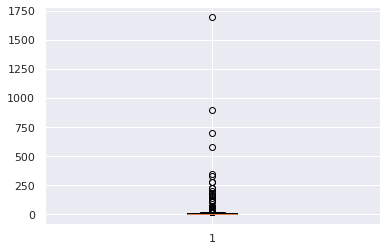

In [76]:
plt.boxplot(data['Funding_in_million'])

In [ ]:
b = plt.boxplot(data['Funding_in_million'])


# New Section

In [77]:
[item.get_ydata() for item in b['boxes']]

[array([ 0.8,  0.8, 10. , 10. ,  0.8])]

In [78]:
median = np.median(data['Funding_in_million'])
upper_quartile = np.percentile(data['Funding_in_million'], 75)
lower_quartile = np.percentile(data['Funding_in_million'], 25)
print(median, upper_quartile, lower_quartile)

2.3499999999999996 10.0 0.8


In [79]:
import plotly.express as px 


In [80]:
fig = px.box(data, x = "Funding_in_million", points="outliers") 
fig.show()

In [ ]:
#8.Check frequency of the OperatingState features classes.
count = data.groupby(['OperatingState']).count() 
print(count) 

In [ ]:
#9.Plot a distribution plot for Funds in million.
plot_data = data['Funding_in_million']
sns.distplot(plot_data);

In [91]:
#10.Plot distribution plots for companies still operating and companies that closed.
data['OperatingState'] = data['OperatingState'].str.replace('Operating','1')




In [86]:
data['OperatingState'] = data['OperatingState'].str.replace('Closed','0')

In [87]:
data['OperatingState'] = data['OperatingState'].str.replace('Acquired','2')

In [88]:
data['OperatingState'] = data['OperatingState'].str.replace('Ipo','2')

In [94]:
data['OperatingState'] = data['OperatingState'].astype('float')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



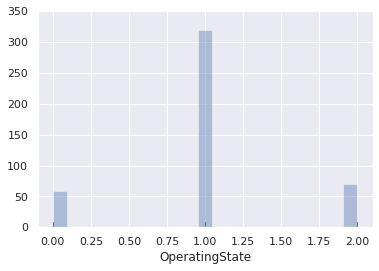

In [92]:
sns.distplot(data['OperatingState'], kde=False, rug=True);

In [85]:
data.dtypes

Startup                object
Product                object
Funding               float64
Event                  object
Result                 object
OperatingState         object
Funding_in_million    float64
dtype: object

**Null and Alternative Hypothesis**

In [83]:
data['Funding_in_million'].mean()

22.839358928571436

In [113]:
from scipy.stats import ttest_1samp, wilcoxon
from statsmodels.stats.power import ttest_power
t_statistic, p_value = ttest_1samp(data['Funding_in_million'],23)
print(t_statistic,p_value)

-0.03184979986850498 0.9746060482086376


In [105]:
# p_value < 0.05 => alternative hypothesis:
# data deviate significantly from the hypothesis that the mean
# is 23 at the 5% level of significance
print ("one-sample t-test p-value=", p_value)

one-sample t-test p-value= 0.9746060482086376


In [109]:
# one sample wilcoxon-test
z_statistic, p_value = wilcoxon(data['Funding_in_million'] - 23)
print ("one-sample wilcoxon-test p-value", p_value)

one-sample wilcoxon-test p-value 5.918417774045409e-38


In [110]:
(np.mean(data['Funding_in_million']) - 23) / np.std(data['Funding_in_million'])

-0.0015064438410467495

In [114]:
print(ttest_power(-0.0015, nobs=11, alpha=0.05, alternative='two-sided'))

0.0500023373858083


**Check distribution of the Event variable**

In [130]:
data_01 = pd.read_csv('Event.csv')
print(data)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,1,2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.



          Startup          Product  ...  OperatingState Funding_in_million
1            3DLT         3dlt.com  ...             0.0               0.63
3      3Dprintler   3dprintler.com  ...             1.0               1.00
5            5to1         5to1.com  ...             2.0              19.30
6    8 Securities  8securities.com  ...             1.0              29.00
10     AdhereTech   adheretech.com  ...             1.0               1.80
..            ...              ...  ...             ...                ...
657        Zivity       zivity.com  ...             1.0               8.00
658        Zmorph     zmorph3d.com  ...             1.0               1.00
659        Zocdoc       zocdoc.com  ...             1.0             223.00
660          Zula      zulaapp.com  ...             1.0               3.40
661        Zumper       zumper.com  ...             1.0              31.50

[448 rows x 7 columns]


In [135]:
data_01['Event'] = data_01['Event'].str.replace('Disrupt NYC 2013','1')

In [136]:
data_01['Event'] = data_01['Event'].str.replace('Disrupt EU 2013','2')

In [137]:
data_01['Event'] = data_01['Event'].str.replace('Disrupt SF 2013','3')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



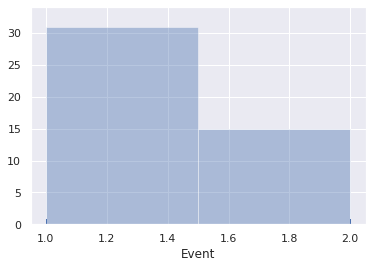

In [138]:
sns.distplot(data_01['Event'], kde=False, rug=True);